<div style="text-align: center; padding: 10px; background-color: #065B82; color:#ffffff; font-size: 40px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">NATURAL LANGUAGE SENTIMENT (RATING OF POEMS)</div>




<div style="text-align: center; padding: 10px; color:#000000; font-size: 30px;">Josephine Taiwo Kayode</div>


><img src = "image/im.jpg" style="display: block; margin: auto;" />/>

<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">1.0 Project Overview</div>


Natural Language Sentiment refers to understanding and figuring out the feelings or emotions expressed in human language, like whether a statement is happy, sad, or neutral. Reading a poem can stir emotions, but everyone feels differently. This project helps with that. By decoding sentiments and predicting engagement, we are figuring out the feelings in comments about the poems and predicting how much people might like and comment on each poem. It's like having a digital friend who decodes the collective sentiment for a more insightful experience.

Objective: The primary goal of this project is to harness the power of Natural Language Processing (NLP) to analyze the sentiment of poems. We aim to predict the sentiment (positive, negative, neutral) and forecast the number of likes and comments each poem might receive based on the sentiments expressed. 

Key Components:

a. Data Collection: 
Gathering the dataset through web scrappings, ensuring they are prepared for preprocessing

b. Data Preprocessing: 
Clean and preprocess the datasets, including tasks such as taking out missing values, type casting, vectorization and exploring techniques for feature extraction a representation of text data.

c. Sentiment Analysis Model: 
Build and train a sentiment analysis model using state-of-the-art Natural Language Processing techniques.
Evaluate the model's performance on a validation set andfinetune  as needed for accurate sentiment predictino

d. Text Mining: To utilize text mining techniques to extract meaningful insights from poets' profiles, poems, and comments, enabling deeper analysis and understanding of the data.

e.  Predictive Modeling for Likes and Comments: 
Explore regression models to predict the number of likes andratingss based on the sentimen and ratingst of each poem.
.




<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">2.0 Data Collection</div>

All the data used in this project was collected through web scraping, a technique used to extract information from websites. This explains that the data was not readily available in a structured format and had to be extracted from the platform's web pages: <a href="https://allpoetry.com/" target="_blank">AllPoetry.com</a> .


## 2.1 Importing Dataset

In [1]:
#Data Loading and Preprocessing
import pandas as pd #For data manipulation and analysis.
import numpy as np  #For numerical operations on arrays and matrices.
import re #Regular expression library for string manipulation.
import string #Provides common string operations.

#Data Visualization
import seaborn as sns #For creating visualizations and plots.
import matplotlib.pyplot as plt #For creating interactive and static plots using Plotly.
import plotly.express as px #For creating interactive and static plots using Plotly.
import plotly.graph_objects as go #For creating interactive and static plots using Plotly.
from plotly.subplots import make_subplots #For creating interactive and static plots using Plotly.

#Data Encoding and Transformation
from sklearn.preprocessing import OneHotEncoder #For encoding categorical features.
from sklearn.preprocessing import LabelEncoder  #For encoding categorical features.
from scipy.sparse import csr_matrix #For efficient sparse matrix representation.

#Text Processing and Analysis
import nltk #Natural Language Toolkit for text processing.
from nltk import pos_tag, word_tokenize #Part-of-speech tagging and word tokenization.
from nltk.corpus import stopwords #Common stopwords for text analysis.
from nltk.stem import WordNetLemmatizer #Lemmatization for word normalization.
from textblob import TextBlob #Text processing library for sentiment analysis.
from sklearn.feature_extraction.text import TfidfVectorizer #Term Frequency-Inverse Document Frequency vectorization for text data.

#WordCloud and Image Processing
from wordcloud import WordCloud #For generating word clouds.
from PIL import Image #: Python Imaging Library for image processing.

#Interactive Visualization Export
import chart_studio.tools as cst #For exporting Plotly visualizations to Chart Studio.
import chart_studio.plotly as py #For exporting Plotly visualizations to Chart Studio.
import plotly.offline as pyo #For offline Plotly visualizations and rendering.
import plotly.io as pio #For offline Plotly visualizations and rendering.
from collections import Counter


# data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import pipeline
from xgboost import XGBRegressor


# data evaluation 
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pickle as pkl


#Additional Utilities
import random #For generating random numbers
from collections import Counter #For counting occurrences of elements
from matplotlib.figure import Figure #For creating Matplotlib figures
import sys #Provides access to some variables used or maintained by the Python interpreter
import warnings #For handling warnings
warnings.filterwarnings("ignore")

 





## 2.2 Poet's Profile

Description: This dataset contains information about poets and their interactions on the platform. It includes various attributes associated with each poet.

#### Columns:

poet_id: Unique identifier for each poet.

followers: Number of followers the poet has.

following: Number of other users that the poet is following.

message_out: Number of messages sent by the poet.

message_in: Number of messages received by the poet.

membership: Type of membership

level: Level of the poet on the platform.

region: Geographical region associated with the poet.

gold: Gold metric.

silver: Silver metric.

bronze: Bronze  metric.

hm: Another metric or attribute associated with the poet.

#### Size: 526 rows and 12 columns.


In [2]:
df_poet = pd.read_csv('datasets/poets.csv')

In [3]:
df_poet.head(10)

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,bronze,hm
0,1,711,432,13416,7722,silver,top gun,Texas,247,243,198,429
1,2,17,17,47,51,Free,topaz horse,NaN,0,0,0,0
2,3,88,7,939,1014,Free,topaz horse,Louisiana,0,0,0,0
3,4,319,87,4731,4978,gold,leap-frog,NaN,115,120,92,193
4,5,376,519,4249,6596,silver,perfect palomino,NaN,187,234,235,905
5,6,56,41,324,226,Free,citrine experience,Kansas,2,4,3,3
6,7,22,19,74,69,gold,perfect palomino,NaN,0,1,0,2
7,8,109,72,549,522,Free,perfect palomino,NaN,0,2,0,1
8,9,251,251,2400,2233,Free,lyric diamond,Virginia,38,42,51,267
9,10,50,15,228,286,Free,citrine experience,NaN,2,1,2,7


## 2.3 Poem Data

Description: This dataset contain information about individual poems posted on the platform.

#### Columns:

poem_id: Unique identifier for each poem.

user_id: Identifier for the user who posted the poem.

title: Title of the poem.

poem: The actual text content of the poem.

likes: The number of likes received by the poem.

#### Size: 19,713 rows and 5 columns.

In [4]:
df_poem = pd.read_csv('datasets/poems.csv')

In [5]:
df_poem.head(10)

,poem_id,user_id,title,poem,likes
0,1,1,11-5-2022,On November 5th**Twenty twenty-two*you and I* ...,13
1,2,1,A Fate That*s Been Sung,Sometimes we grow to*understand our pain.* ...,3
2,3,1,The Carnation Dances In June,when spring ended*and summer days began*she bl...,4
3,4,1,When Did I Become The Other Woman....?,in the night when crickets chirp*and the winds...,10
4,5,1,The Storms Reminder of You,it is when skies are grey*and thunder growls*a...,10
5,6,1,In Memory of Sonja (Allseasonverse),the universe spins*slowly around us*babies are...,19
6,7,1,Panic On Display,dressed in a glittered orchid gown*I*m like a ...,5
7,8,1,The Shame,darkness is my fortress*inside I hide*from pry...,55
8,9,1,Weightless,my body was weakening*giving up on me*I could ...,8
9,10,1,Foundation Cracking,my foundation was applied*at an early age in l...,5


In [6]:
df_poem["poem"]

0        On November 5th**Twenty twenty-two*you and I* ...
1          Sometimes we grow to*understand our pain.*  ...
2        when spring ended*and summer days began*she bl...
3        in the night when crickets chirp*and the winds...
4        it is when skies are grey*and thunder growls*a...
                               ...                        
19708    Here*In the sun light*With the rays of light*W...
19709    The only thing I believe in*Is that we have a*...
19710    Love is a very powerful Force for peace? Which...
19711    Currents in and out*So many issues so lil time...
19712    Is what I am*Standing strong*With the flow*Is ...
Name: poem, Length: 19713, dtype: object

In [7]:
df_poem["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19708     1
19709     1
19710     2
19711     2
19712     0
Name: likes, Length: 19713, dtype: int64

## 2.4 Comment Data

Description: This dataset contain comments associated with poems.

poem_id: Identifier linking the comment to a specific poem.

comment: The text content of the comment.

Size: 
159,371 rows and 2 columns.


In [8]:

df_comment = pd.read_csv('datasets/comments.csv')

In [9]:
df_comment

,poem_id,comment
1,1,Wings So filled with love and congratulation...
2,1,And may it last long and be wonerful. well p...
3,1,Congrats! a bit late but nerveless happy endi...
4,1,What a beautiful piece. Thank you so much for...
5,1,Wow* wonderful. I loved the way you penned down
...,...,...
159367,19711,NaN
159368,19712,Amen Nice job.
159369,19712,NaN
159370,19713,Lovely piece here* indeed we are in some stra...



<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">3.0 Data Preprocessing</div>

In this stage, several crucial steps were undertaken to ensure the dataset's readiness for sentiment analysis on poems. The process involved cleaning the data, handling missing values, encoding categorical variables, and preparing the text data for analysis.

## PREPROCESSING FOR POET'S PROFILE DATA

In [10]:
df_poet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           526 non-null    int64 
 1   followers    526 non-null    int64 
 2   following    526 non-null    int64 
 3   message_out  526 non-null    int64 
 4   message_in   526 non-null    int64 
 5   membership   526 non-null    object
 6   level        472 non-null    object
 7   region       220 non-null    object
 8   gold         526 non-null    int64 
 9   silver       526 non-null    int64 
 10  bronze       526 non-null    int64 
 11  hm           526 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 49.4+ KB


#### Handling null values

Null values were identified in this dataset, and appropriate measures were taken to remove them. This ensures that the data used for analysis is complete and avoids any potential issues associated with missing values.

In [11]:
df_poet.isna().sum()

id               0
followers        0
following        0
message_out      0
message_in       0
membership       0
level           54
region         306
gold             0
silver           0
bronze           0
hm               0
dtype: int64

In [12]:

df_poet["level"] = df_poet["level"].fillna("missing")
df_poet["region"] = df_poet["region"].fillna("Not found")

In [13]:

df_poet.isna().sum()

id             0
followers      0
following      0
message_out    0
message_in     0
membership     0
level          0
region         0
gold           0
silver         0
bronze         0
hm             0
dtype: int64

#### Data Type Conversion

The data types of object columns were converted using label encoding. This step is essential for preparing the data for machine learning models, as they often require numerical input.

In [14]:

encoder1 = LabelEncoder()

In [15]:
df_poet["membership"] = encoder1.fit_transform(df_poet["membership"])
df_poet["level"] = encoder1.fit_transform(df_poet["level"])
df_poet["region"] = encoder1.fit_transform(df_poet["region"])


In [16]:
df_poet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           526 non-null    int64
 1   followers    526 non-null    int64
 2   following    526 non-null    int64
 3   message_out  526 non-null    int64
 4   message_in   526 non-null    int64
 5   membership   526 non-null    int32
 6   level        526 non-null    int32
 7   region       526 non-null    int32
 8   gold         526 non-null    int64
 9   silver       526 non-null    int64
 10  bronze       526 non-null    int64
 11  hm           526 non-null    int64
dtypes: int32(3), int64(9)
memory usage: 43.3 KB


## PREPROCESSING FOR POEM DATA

In [17]:
df_poem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19713 entries, 0 to 19712
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   poem_id  19713 non-null  int64 
 1   user_id  19713 non-null  int64 
 2   title    19669 non-null  object
 3   poem     19674 non-null  object
 4   likes    19713 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 770.2+ KB


#### Handling null values


Null values were identified in this dataset, and appropriate measures were taken to remove them. This ensures that the data used for analysis is complete and avoids any potential issues associated with missing values.

In [18]:

df_poem.dropna(subset=["title"], inplace=True)
df_poem.dropna(subset=["poem"], inplace=True)

In [19]:
df_poem.isna().sum()

poem_id    0
user_id    0
title      0
poem       0
likes      0
dtype: int64

In [20]:
df_poem["likes"].info()

<class 'pandas.core.series.Series'>
Index: 19664 entries, 0 to 19712
Series name: likes
Non-Null Count  Dtype
--------------  -----
19664 non-null  int64
dtypes: int64(1)
memory usage: 307.2 KB


## PREPROCESSING FOR COMMENT DATA 

#### Handling null values

In [27]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159371 entries, 1 to 159371
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   poem_id  159371 non-null  int64 
 1   comment  155466 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [28]:
df_comment.isna().sum()

poem_id       0
comment    3905
dtype: int64

In [29]:
df_comment.dropna(subset=["comment"], inplace=True)

In [30]:
df_comment.isna().sum()

poem_id    0
comment    0
dtype: int64

## TEXT DATA PROCESSING (COMMENT COLUMN)



The TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique was applied to the comment column. This transformation converts the raw text into numerical features, considering the importance of each term in the context of the entire dataset. It is a critical step for preparing the text data for machine learning models.

In [31]:
tfidf_vectorizer1 = TfidfVectorizer()

In [32]:
comments = df_comment['comment']

In [33]:
X = tfidf_vectorizer1.fit_transform(comments)

In [34]:
feature_names = tfidf_vectorizer1.get_feature_names_out()

In [35]:
feature_names.shape

(50246,)

In [36]:
df_comments_vec_comments = pd.DataFrame.sparse.from_spmatrix(X, columns=feature_names)

In [37]:
df_comments_vec_comments

,00,000,005,007,01,02,03,0338,04,05,...,zulhaqim,zulu,zur,zuse,zyada,zz,zzblpoyynr,zzz,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TEXT DATA PROCESSING (TITLE COLUMN)

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique was applied to the title column. This transformation converts the raw text into numerical features, considering the importance of each term in the context of the entire dataset. It is a critical step for preparing the text data for machine learning models.

In [38]:
tfidf_vectorizer_title = TfidfVectorizer()

In [39]:
Title = df_poem['title']

In [40]:
X2 = tfidf_vectorizer_title.fit_transform(Title)

In [41]:
feature_names2 = tfidf_vectorizer_title.get_feature_names_out()

In [42]:
feature_names2.shape

(11985,)

In [43]:

df_poem_vec_title = pd.DataFrame.sparse.from_spmatrix(X2, columns=feature_names2)

In [44]:
df_poem_vec_title

,00,000,006,0076,01,0101720242,01132242,011420231,011520243,011520247,...,ztill,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TEXT DATA PROCESSING (POEM COLUMN)

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique was applied to the poem column. This transformation converts the raw text into numerical features, considering the importance of each term in the context of the entire dataset. It is a critical step for preparing the text data for machine learning models.

In [45]:
tfidf_vectorizer_poem = TfidfVectorizer()

In [46]:
Poem = df_poem['poem']

In [47]:


X3 = tfidf_vectorizer_poem.fit_transform(Poem)

In [48]:
feature_names3 = tfidf_vectorizer_poem.get_feature_names_out()

In [49]:
feature_names3

array(['00', '000', '0000', ..., 'zzz', 'zzzar', 'zzzz'], dtype=object)

In [50]:
df_vec_poems = pd.DataFrame.sparse.from_spmatrix(X3, columns=feature_names3)

In [51]:
df_vec_poems

,00,000,0000,0001,0002,001,0024,003,004,006,...,zurra,zuzu,zwetsloot,zygote,zyndagi,zyw,zywa,zzz,zzzar,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_poem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19664 entries, 0 to 19712
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   poem_id  19664 non-null  int64 
 1   user_id  19664 non-null  int64 
 2   title    19664 non-null  object
 3   poem     19664 non-null  object
 4   likes    19664 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 921.8+ KB


In [53]:
df_poem["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19708     1
19709     1
19710     2
19711     2
19712     0
Name: likes, Length: 19664, dtype: int64

In [54]:
df_poem.isnull().sum()

poem_id    0
user_id    0
title      0
poem       0
likes      0
dtype: int64

In [55]:
df_poem.dropna(inplace=True)

In [56]:
df_poem.isnull().sum()

poem_id    0
user_id    0
title      0
poem       0
likes      0
dtype: int64

In [57]:
df_poem["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19708     1
19709     1
19710     2
19711     2
19712     0
Name: likes, Length: 19664, dtype: int64

## DATA INTEGRATION

The 'df_poet' and 'df_poem' datasets were merged based on the common identifier 'id' and 'user_id' using an inner join. This consolidation brings together information about poets and their associated poems in a single dataset.

In [58]:
df_main = pd.merge(left = df_poet, right = df_poem, how='inner', left_on='id', right_on='user_id')

In [59]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           19664 non-null  int64 
 1   followers    19664 non-null  int64 
 2   following    19664 non-null  int64 
 3   message_out  19664 non-null  int64 
 4   message_in   19664 non-null  int64 
 5   membership   19664 non-null  int32 
 6   level        19664 non-null  int32 
 7   region       19664 non-null  int32 
 8   gold         19664 non-null  int64 
 9   silver       19664 non-null  int64 
 10  bronze       19664 non-null  int64 
 11  hm           19664 non-null  int64 
 12  poem_id      19664 non-null  int64 
 13  user_id      19664 non-null  int64 
 14  title        19664 non-null  object
 15  poem         19664 non-null  object
 16  likes        19664 non-null  int64 
dtypes: int32(3), int64(12), object(2)
memory usage: 2.3+ MB


In [60]:
df_poem["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19708     1
19709     1
19710     2
19711     2
19712     0
Name: likes, Length: 19664, dtype: int64

## SENTIMENT POLARITY / RATING CALCULATION

Sentiment polarity was computed for both comments and poems using the TextBlob library. The function getPolarity was defined, taking a text input and returning its sentiment polarity. This sentiment analysis provides a numerical representation of the emotional tone of comments and poems.

The "rating" column is generated by applying sentiment analysis to the "comment" column using the TextBlob library. The sentiment polarity of each comment is calculated, representing the degree of positivity or negativity, and stored in the "rating" column. This process helps quantify the sentiment expressed in the comments, potentially indicating the overall sentiment towards poems or poets.

In [339]:
def getPolarity(comment):
    return TextBlob(comment).sentiment.polarity 

In [340]:
df_comment['rating']=df_comment['comment'].apply(getPolarity)

In [341]:

def get_rating(poem_id):
    comments_for_poem = df_comment[df_comment['poem_id'] == poem_id]
    return comments_for_poem['rating'].mean()

df_main['rating'] = df_main['poem_id'].apply(get_rating)

In [342]:
df_main

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,bronze,hm,poem_id,user_id,title,poem,likes,rating
0,1,711,432,13416,7722,2,43,39,247,243,198,429,1,1,11-5-2022,On November 5th**Twenty twenty-two*you and I* ...,13,0.375730
1,1,711,432,13416,7722,2,43,39,247,243,198,429,2,1,A Fate That*s Been Sung,Sometimes we grow to*understand our pain.* ...,3,0.210417
2,1,711,432,13416,7722,2,43,39,247,243,198,429,3,1,The Carnation Dances In June,when spring ended*and summer days began*she bl...,4,0.424306
3,1,711,432,13416,7722,2,43,39,247,243,198,429,4,1,When Did I Become The Other Woman....?,in the night when crickets chirp*and the winds...,10,0.230141
4,1,711,432,13416,7722,2,43,39,247,243,198,429,5,1,The Storms Reminder of You,it is when skies are grey*and thunder growls*a...,10,0.372956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,526,278,1047,574,518,0,37,30,0,0,0,1,19709,526,How can I stay awake,Here*In the sun light*With the rays of light*W...,1,0.566667
19660,526,278,1047,574,518,0,37,30,0,0,0,1,19710,526,All I hope for is a victory for us,The only thing I believe in*Is that we have a*...,1,0.740000
19661,526,278,1047,574,518,0,37,30,0,0,0,1,19711,526,[ Love is a very powerful Force for peace? Whi...,Love is a very powerful Force for peace? Which...,2,0.529704
19662,526,278,1047,574,518,0,37,30,0,0,0,1,19712,526,Life are Waves,Currents in and out*So many issues so lil time...,2,0.600000


In [343]:

df_poem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19664 entries, 0 to 19712
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   poem_id  19664 non-null  int64 
 1   user_id  19664 non-null  int64 
 2   title    19664 non-null  object
 3   poem     19664 non-null  object
 4   likes    19664 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 921.8+ KB


In [344]:
df_comment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155466 entries, 1 to 159370
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   poem_id  155466 non-null  int64  
 1   comment  155466 non-null  object 
 2   rating   155466 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ MB


The 'title' column was dropped from the merged dataset, and a new column, 'title_comments,' was created by concatenating the 'title' and 'comment' columns multiplied by a factor of 10. This operation enhances the importance of titles in the sentiment analysis.

In [345]:
df_main = pd.concat([df_main.drop('title', axis=1), df_poem_vec_title * 10], axis = 1)

## KEY RESULT

The processed dataset, named 'df_main,' is now ready for sentiment analysis. It combines information about poets and their associated poems, providing a solid foundation for exploring emotional tones.

In [346]:
df_main.head(10)

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,...,ztill,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz
0,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [347]:
df_main.drop("poem", axis = 1, inplace = True)

In [348]:
len(list(df_main.columns)) - len(set(list(df_main.columns)))

5

In [349]:
df_main["likes"]

,likes,likes
0,13,0.0
1,3,0.0
2,4,0.0
3,10,0.0
4,10,0.0
...,...,...
19659,1,0.0
19660,1,0.0
19661,2,0.0
19662,2,0.0


In [350]:
df_main = df_main.loc[:, ~df_main.columns.duplicated(keep="first")]

duplicated_mask = df_main.columns.duplicated(keep="first")
duplicate_columns = [col for col, is_duplicated in zip(df_main.columns, duplicated_mask) if is_duplicated]
print(duplicate_columns)   


[]


In [351]:
df_main["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19659     1
19660     1
19661     2
19662     2
19663     0
Name: likes, Length: 19664, dtype: int64

<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">4.0 Sentiment Analysis and Labelling</div>

In this phase, we delve into the emotional nuances expressed in the poems through sentiment analysis. The goal is to assign sentiment labels to each poem, categorizing them as positive, negative, or neutral based on the calculated sentiment polarity.

## METHODOLOGY

### TextBlob Sentiment Analysis

We opted for the TextBlob library to perform sentiment analysis due to its simplicity and effectiveness in assessing sentiment polarity. Sentiment polarity is a numerical representation of the positivity or negativity of the text, ranging from -1 (negative) to 1 (positive)

In [352]:
def get_comment_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:  
        return 'negative'
    else:
        return 'neutral'

In [353]:
df_main['Sentiments'] = df_main['rating'].apply(get_comment_sentiment_label)


In [354]:
df_main['rating']

0        0.375730
1        0.210417
2        0.424306
3        0.230141
4        0.372956
           ...   
19659    0.566667
19660    0.740000
19661    0.529704
19662    0.600000
19663    0.225000
Name: rating, Length: 19664, dtype: float64

In [355]:
df_main['comment']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19659    0.0
19660    0.0
19661    0.0
19662    0.0
19663    0.0
Name: comment, Length: 19664, dtype: Sparse[float64, 0.0]

In [356]:
df_main.head()

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,...,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz,Sentiments
0,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


## SENTIMENT RESULTS

#### Table: Comment Sentiment Analysis Results

The following table presents a snapshot of the sentiments associated with each poem, showcasing their ratings and assigned labels.

In [357]:
result_table = df_main[['comment', 'rating', 'Sentiments']]
result_table

,comment,rating,Sentiments
0,0.0,0.375730,positive
1,0.0,0.210417,positive
2,0.0,0.424306,positive
3,0.0,0.230141,positive
4,0.0,0.372956,positive
...,...,...,...
19659,0.0,0.566667,positive
19660,0.0,0.740000,positive
19661,0.0,0.529704,positive
19662,0.0,0.600000,positive


In [358]:
# Filter poems with positive sentiment
positive_comments = df_main[df_main['Sentiments'] == 'positive']

# Filter poems with negative sentiment
negative_comments = df_main[df_main['Sentiments'] == 'negative']

# Filter poems with neutral sentiment
neutral_comments = df_main[df_main['Sentiments'] == 'neutral']


#### POSITIVE COMMENT SENTIMENT 

In [359]:
positive_comments = positive_comments[['comment', 'rating', 'Sentiments']]

In [360]:
positive_comments

,comment,rating,Sentiments
0,0.0,0.375730,positive
1,0.0,0.210417,positive
2,0.0,0.424306,positive
3,0.0,0.230141,positive
4,0.0,0.372956,positive
...,...,...,...
19659,0.0,0.566667,positive
19660,0.0,0.740000,positive
19661,0.0,0.529704,positive
19662,0.0,0.600000,positive


#### NEGATIVE COMMENT SENTIMENT 

In [361]:
negative_comments = negative_comments[['comment', 'rating', 'Sentiments']]

In [362]:
negative_comments

,comment,rating,Sentiments
108,0.0,-0.092361,negative
112,0.0,-0.019597,negative
176,0.0,-0.069333,negative
226,0.0,-0.062500,negative
235,0.0,-0.195000,negative
...,...,...,...
19531,0.0,-0.100000,negative
19539,0.0,-0.275000,negative
19581,0.0,-0.300000,negative
19629,0.0,-0.130000,negative


#### NEUTRAL COMMENT SENTIMENT 

In [363]:
neutral_comments = neutral_comments[['comment', 'rating', 'Sentiments']]

In [364]:
neutral_comments

,comment,rating,Sentiments
76,0.0,0.0,neutral
111,0.0,0.0,neutral
222,0.0,NaN,neutral
225,0.0,0.0,neutral
234,0.0,0.0,neutral
...,...,...,...
19623,0.0,NaN,neutral
19624,0.0,0.0,neutral
19625,0.0,NaN,neutral
19646,0.0,NaN,neutral


In [365]:
# Create dataframe for Count of Sentiment Categories
bar_chart =df_main['Sentiments'].value_counts().rename_axis('Sentiments').to_frame('Total Sentiments').reset_index()

In [366]:
bar_chart

,Sentiments,Total Sentiments
0,positive,18483
1,neutral,743
2,negative,438


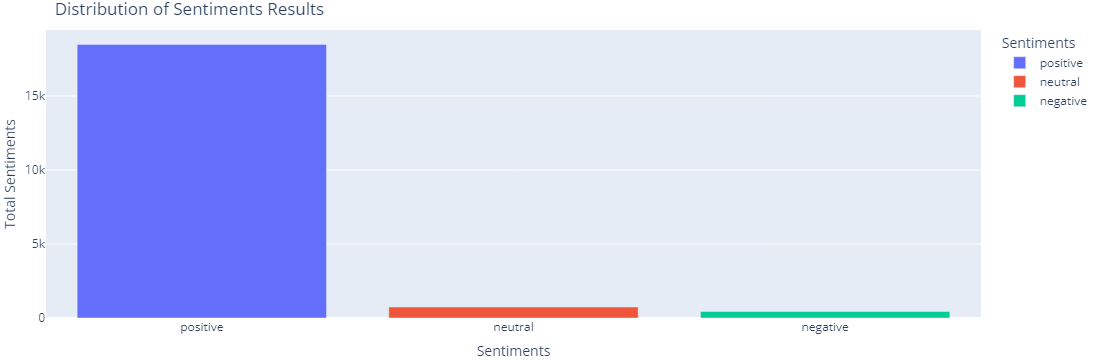

In [367]:
sentiments_barchart = px.bar(bar_chart, x = 'Sentiments', y='Total Sentiments', color='Sentiments')

sentiments_barchart.update_layout(title='Distribution of Sentiments Results',
                                  margin={"r": 0, "t": 30, "l": 0, "b": 0})

sentiments_barchart.show() #Display plot. 


<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">5.0 Text Analysis / Text Mining</div>

In this project, we processed text data using TextBlob to facilitate sentiment analysis. We assessed the sentiment of comments, categorizing them as positive, negative, or neutral. Leveraging these sentiment insights, we assigned sentiment scores, essentially ratings, to each comment. Moreover, we aggregated these sentiment scores to rate poems, providing an overall sentiment-based evaluation.

Additionally, word cloud visualizations were generated to highlight the most frequently occurring words in the text data, facilitating the identification of prevalent themes and topics. These techniques provided valuable insights into the content of the text data, allowing for a deeper understanding of the sentiments expressed and the key themes present within the datasets.

In [368]:
# Function to extract adjectives from a given text
def extract_adjectives(text):
    if isinstance(text, str):
        words = word_tokenize(text) 
        words = [word for word in words if word.lower() not in stopwords.words('english')]
        pos_tags = pos_tag(words)
        lemmatizer = WordNetLemmatizer()
        adjectives = [lemmatizer.lemmatize(word, pos='a') for word, pos in pos_tags if pos.startswith('JJ')]
        return adjectives
    else:
        return []

# Load your dataset
df_comment = pd.read_csv('datasets/comments.csv')

# Apply adjective extraction to all comments in the 'comment' column
df_comment['adjectives'] = df_comment['comment'].apply(extract_adjectives)

# Display the result
print(df_comment[['comment']])
print(df_comment[['adjectives']])  

                                                  comment
1       Wings   So filled with love and congratulation...
2        And may it last long and be wonerful.  well p...
3        Congrats! a bit late but nerveless happy endi...
4        What a beautiful piece. Thank you so much for...
5         Wow* wonderful. I loved the way you penned down
...                                                   ...
159367                                                NaN
159368                                   Amen   Nice job.
159369                                                NaN
159370   Lovely piece here* indeed we are in some stra...
159371                                                NaN

[159371 rows x 1 columns]
                             adjectives
1                                [deep]
2       [last, long, penned, uplifting]
3                         [late, happy]
4                     [beautiful, much]
5                               [loved]
...                                 .

In [369]:
# Load an image to use as a mask for the word cloud
image_path = 'Image/il.png'
image = Image.open(image_path)
mask = np.array(image)

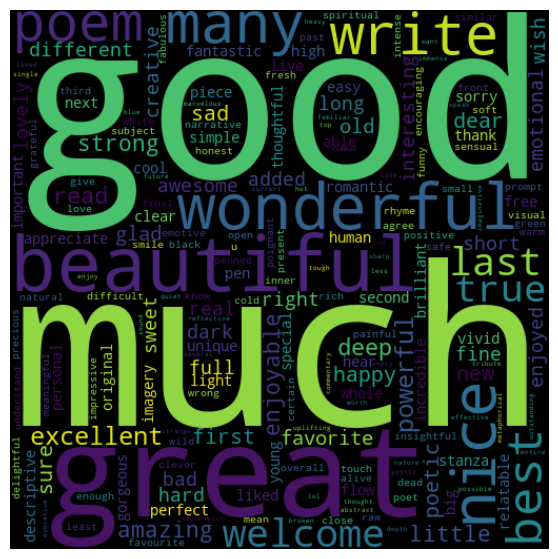

In [370]:
# Assuming df is your DataFrame with the 'adjectives' column

# Combine all adjectives into a single string
Comments_long_string  = ' '.join(df_comment['adjectives'].dropna().astype(str))

# Preprocess the text data
translator = str.maketrans('', '', string.punctuation)
Comments_long_string  = Comments_long_string.lower().translate(translator)

# Remove stopwords 
stop_words = set(stopwords.words('english'))
Comments_long_string  = ' '.join(word for word in Comments_long_string.split() if word not in stop_words)

# Generate the word cloud
wordcloud = WordCloud(width=50, height=50, background_color='black', collocations=False, mask = mask).generate(Comments_long_string)

# Plot the Word Cloud
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()
wordcloud .to_file("wordcloud.png")

<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">6.0 Data Cleaning and Engineering </div>

The dataset contains punctuations and numbers. Words also exist in different cases which models might translate differently. Hence, the proceeding function performs cleaning by:

#Removing punctuations

#Changing Case to lowercase

#Removing stop words


In [87]:
# Get the set of English stop words
stop_words = set(stopwords.words('english'))

# Preprocess the text data to remove stop words
def preprocess_text(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        words = text.lower().translate(translator).split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    elif isinstance(text, list):
        # If the element is already a list, filter out stop words
        return [word for word in text if word not in stop_words]
    else:
        return text

# Apply the preprocessing function to the 'adjectives' column
df_comment['adjectives'] = df_comment['adjectives'].apply(preprocess_text)

In [88]:
Comments_long_string = df_comment["adjectives"].tolist()
comments_list = []

for text in Comments_long_string:
    # Check if the element is a string
    if isinstance(text, str):
        words = text.split()
        comments_list.extend(words)
    # Check if the element is a list
    elif isinstance(text, list):
        comments_list.extend(text)

### Analysing top words in the wordcloud

In [89]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(comments_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [90]:
df.drop(38, inplace=True)

In [91]:
df.head(10)

,Words,Count
8,much,13019
10,good,9730
14,great,8576
7,beautiful,5919
50,nice,4104
21,write,4000
80,poem,3553
40,Good,3421
37,many,3412
86,wonderful,3311


## Graphical Representation of the Most Common 10 Words 

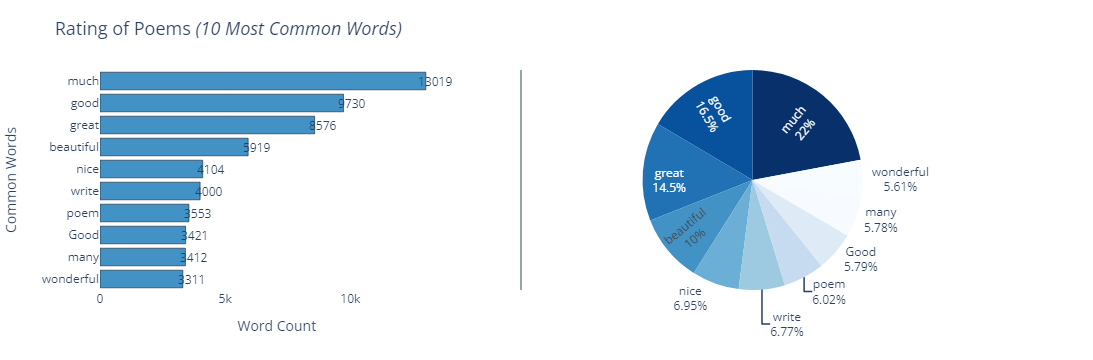

In [92]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = df['Count'].head(10), y=df['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=df['Words'].head(10),values=df['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Rating of Poems <i>(10 Most Common Words)</i>",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = df['Count'].head(10).to_list()
y = df['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(render = 'png')

<div style="text-align: Left; padding: 10px; background-color: #013754; color:#ffffff; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">6.0 Modelling and Evaluation</div>

In [93]:
performance_table = {}

In [94]:
model = "Desicion Tree", 'Random Forest', 'XGB Regression'

# 6.1 Predicting "Rating"

#### Splitting the Dataset into train and Test

In [95]:
df_main["rating"]

0        0.375730
1        0.210417
2        0.424306
3        0.230141
4        0.372956
           ...   
19659    0.566667
19660    0.740000
19661    0.529704
19662    0.600000
19663    0.225000
Name: rating, Length: 19664, dtype: float64

In [118]:
df_main

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,...,ztill,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz
0,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,711,432,13416,7722,2,43,39,247,243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19659,526,278,1047,574,518,0,37,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19660,526,278,1047,574,518,0,37,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19661,526,278,1047,574,518,0,37,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19662,526,278,1047,574,518,0,37,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [371]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Columns: 11996 entries, id to Sentiments
dtypes: Sparse[float64, 0.0](11979), float64(1), int32(3), int64(12), object(1)
memory usage: 3.0+ MB


In [282]:
#df_main.drop('Sentiments', axis = 1, inplace = True)

In [281]:
#df_main["poem"]

In [279]:
#df_main.drop('poem', axis = 1, inplace = True)

In [122]:
y = df_main["rating"]
X = df_main.drop("rating", axis = 1)

In [123]:
df_main["rating"]

0        0.375730
1        0.210417
2        0.424306
3        0.230141
4        0.372956
           ...   
19659    0.566667
19660    0.740000
19661    0.529704
19662    0.600000
19663    0.225000
Name: rating, Length: 19664, dtype: float64

In [124]:
df_main["rating"].isnull().sum()

446

In [125]:
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())


Missing values in X: id             0
followers      0
following      0
message_out    0
message_in     0
              ..
zuu            0
zuzu           0
zweet          0
zylent         0
zzzz           0
Length: 11994, dtype: int64
Missing values in y: 446


In [126]:
print("Missing values in y:", y.isnull().sum())


Missing values in y: 446


In [127]:
mean_y = y.mean()
y.fillna(mean_y, inplace=True)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [129]:
X_train = X_train.loc[:, ~X_train.columns.duplicated(keep='first')]

duplicated_mask = X_train.columns.duplicated(keep='first')
duplicate_columns = [col for col, is_duplicated in zip(X_train.columns, duplicated_mask) if is_duplicated]
print(duplicate_columns)   


[]


In [130]:
X_train.head()

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,...,ztill,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz
17502,463,13,16,45,31,0,44,27,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,80,43,118,120,113,0,33,39,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2208,56,69,65,325,390,0,47,30,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10222,263,326,480,4878,5438,0,6,30,41,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1188,31,115,186,1288,888,0,35,30,6,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
X_test = X_test.loc[:, ~X_test.columns.duplicated(keep='last')]

In [132]:
X_test.head()

,id,followers,following,message_out,message_in,membership,level,region,gold,silver,...,ztill,zucchini,zuegma,zulmut,zur,zuu,zuzu,zweet,zylent,zzzz
3618,94,99,177,375,332,0,47,30,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6732,172,19,25,79,54,0,44,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18948,504,184,116,761,1468,2,41,44,39,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1078,28,551,1140,2281,1669,0,41,30,7,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15270,398,473,103,7380,9315,0,33,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 15731 entries, 17502 to 19632
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
15731 non-null  float64
dtypes: float64(1)
memory usage: 245.8 KB


In [134]:
 y_test.head()

3618     0.247792
6732     0.357186
18948    0.451712
1078     0.332709
15270    0.268676
Name: rating, dtype: float64

## Decision Tree Regressor Model

In [135]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [136]:
Decison_Tree_pred = dt_regressor .predict(X_test)
Decison_Tree_pred

array([0.29285714, 0.8       , 0.47326389, ..., 0.42672619, 0.45833333,
       0.48125   ])

In [137]:
 mean_absolute_error(Decison_Tree_pred, y_test)

0.15677978883358354

## Random Forest Regression Model

In [138]:
r_model = RandomForestRegressor()

In [139]:
r_model.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
result = r_model.predict(X_test)

In [141]:
result

array([0.34679301, 0.29830968, 0.4000491 , ..., 0.44288271, 0.4594078 ,
       0.42036192])

In [142]:

mean_absolute_error(result, y_test)

0.12829032644781552

In [143]:
df_poem["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19708     1
19709     1
19710     2
19711     2
19712     0
Name: likes, Length: 19664, dtype: int64

In [144]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Columns: 11995 entries, id to zzzz
dtypes: Sparse[float64, 0.0](11979), float64(1), int32(3), int64(12)
memory usage: 2.8 MB


## XGB Regression Model

In [145]:
xgb_rating = XGBRegressor()

In [146]:
xgb_rating.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [147]:
xgb_booster_pred = xgb_rating.predict(X_test)


In [148]:
xgb_booster_pred

array([0.32772473, 0.3514942 , 0.3888145 , ..., 0.39182317, 0.3978357 ,
       0.3779754 ], dtype=float32)

In [149]:
 mean_absolute_error(xgb_booster_pred, y_test)

0.12789202148986373

# 6.2 Predicting Likes

### Splitting the Dataset into train and Test

In [207]:
df_main["likes"]

0        13
1         3
2         4
3        10
4        10
         ..
19659     1
19660     1
19661     2
19662     2
19663     0
Name: likes, Length: 19664, dtype: int64

In [208]:
df_main["likes"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19664 entries, 0 to 19663
Series name: likes
Non-Null Count  Dtype
--------------  -----
19664 non-null  int64
dtypes: int64(1)
memory usage: 153.8 KB


In [190]:
len(list(df_poem.columns)) - len(set(list(df_poem.columns)))

0

In [209]:
y =df_main["likes"]
X = df_main.drop("likes", axis = 1)

In [210]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19664 entries, 0 to 19663
Series name: likes
Non-Null Count  Dtype
--------------  -----
19664 non-null  int64
dtypes: int64(1)
memory usage: 153.8 KB


In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Columns: 11994 entries, id to zzzz
dtypes: Sparse[float64, 0.0](11979), float64(1), int32(3), int64(11)
memory usage: 2.7 MB


In [212]:
X.isnull().sum()

id             0
followers      0
following      0
message_out    0
message_in     0
              ..
zuu            0
zuzu           0
zweet          0
zylent         0
zzzz           0
Length: 11994, dtype: int64

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [214]:
dt_likes = DecisionTreeRegressor()



In [215]:
dt_likes.fit(X_train, y_train)

DecisionTreeRegressor()

In [216]:
Decison_Tree_pred1 = dt_likes.predict(X_test)
Decison_Tree_pred1

array([0., 1., 1., ..., 2., 5., 2.])

In [217]:
mean_absolute_error(Decison_Tree_pred1, y_test)

3.916603101957793

In [218]:
mean_y = X.mean()
X.fillna(mean_y, inplace=True)

In [180]:
X.dropna(axis = 1, inplace = True)

In [169]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5900 entries, 19049 to 15973
Columns: 11994 entries, id to zzzz
dtypes: Sparse[float64, 0.0](11979), float64(1), int32(3), int64(11)
memory usage: 869.6 KB


In [163]:
r_model_likes = RandomForestRegressor()

In [164]:
r_model_likes.fit(X_train, y_train)

RandomForestRegressor()

In [165]:
r_model1 = r_model_likes.predict(X_test)
r_model1

array([0.95, 1.63, 1.35, ..., 7.96, 2.16, 3.53])

In [167]:
mean_absolute_error(r_model1, y_test)

3.2765542372881358

In [220]:
xgb_rating_likes = XGBRegressor()

In [221]:
xgb_rating_likes.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [222]:
xgb_booster_pred_likes = xgb_rating_likes.predict(X_test)


In [223]:
xgb_booster_pred_likes

array([ 3.4245768,  2.477062 ,  5.1724734, ...,  4.1280956, 16.36456  ,
        4.230941 ], dtype=float32)

In [226]:
mean_absolute_error(xgb_booster_pred_likes, y_test)

3.984908575144971

In [227]:
with open ("Encoders/encoder1.pkl", "wb") as f:
    pkl.dump(encoder1, f)


with open ("Encoders/tfidf_vectorizer1.pkl", "wb") as f:
    pkl.dump(tfidf_vectorizer1, f)

with open ("Encoders/tfidf_vectorizer_title.pkl", "wb") as f:
    pkl.dump(tfidf_vectorizer_title, f)

with open ("Encoders/tfidf_vectorizer_poem.pkl", "wb") as f:
    pkl.dump(tfidf_vectorizer_poem, f)

with open ("Models/dt_regressor.pkl", "wb") as f:
    pkl.dump(dt_regressor, f)
    
with open ("Models/r_model.pkl", "wb") as f:
    pkl.dump(r_model, f)

with open ("Models/xgb_rating.pkl", "wb") as f:
    pkl.dump(xgb_rating, f)

with open ("Models/dt_likes .pkl", "wb") as f:
    pkl.dump(dt_likes, f)
    
with open ("Models/r_model_likes.pkl", "wb") as f:
    pkl.dump(r_model_likes, f)

with open ("Models/xgb_rating_likes.pkl", "wb") as f:
    pkl.dump(xgb_rating_likes, f)

